# Full Dirichlet VPINN example

In [1]:
from MeshLib import MeshLib as ml

from VPINN_tri_final import *

from PROBDEF import PROBDEF

import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2023-12-05 02:23:18.182528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 02:23:19.362556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

MeshLib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 




### Initialise mesh

In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=54)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
#mesh = generate_mesh(domain, 0.01)

### Train boundary condition network

In [3]:
#net used for approximating the fully dirichlet bc  
bc_model = tfk.models.Sequential()
bc_model.add(tf.keras.Input(shape=(2,),dtype=tf_type))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [4]:
print(bc_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 371 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
# setting model to the current net
model = bc_model


# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

NameError: name 'bc_model' is not defined

In [18]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

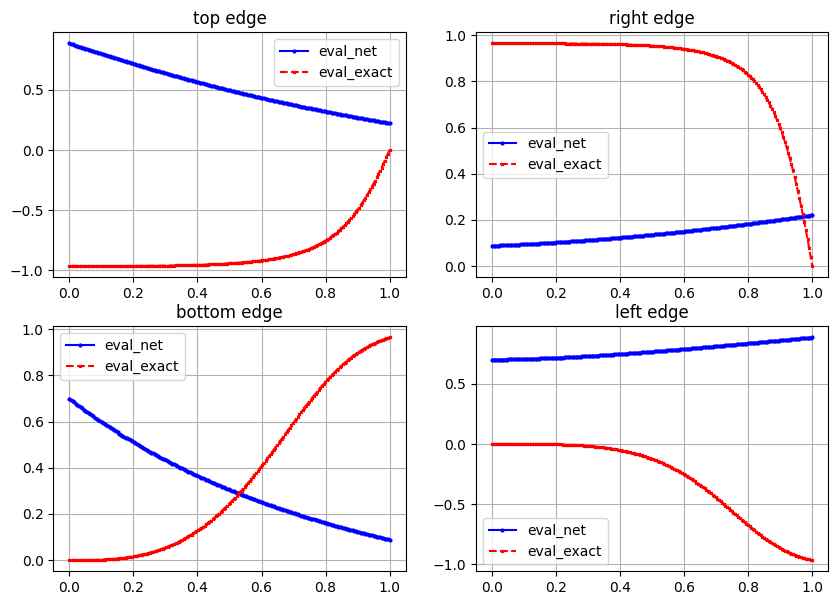

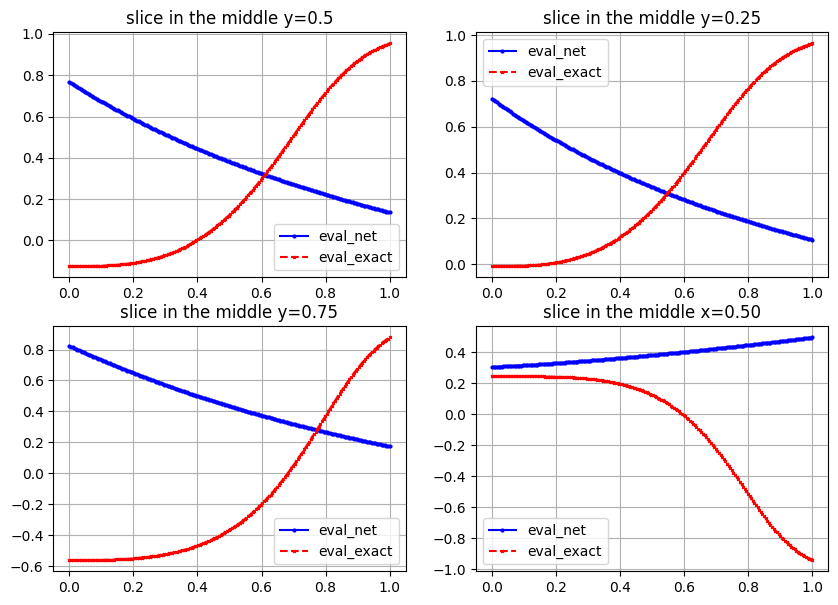

In [7]:
# Compare untrained model to the exact version
plot_BC(pb.u_exact_np,model_np)

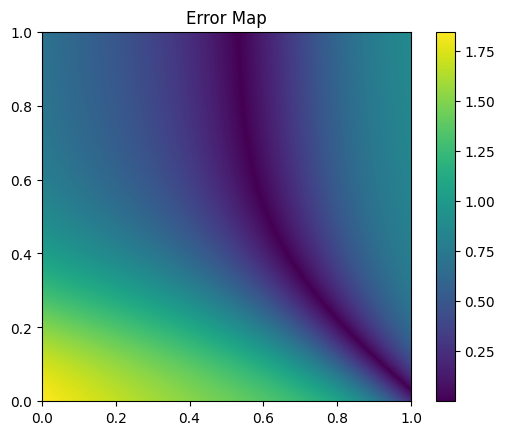

In [8]:
color_plot(bc_model)

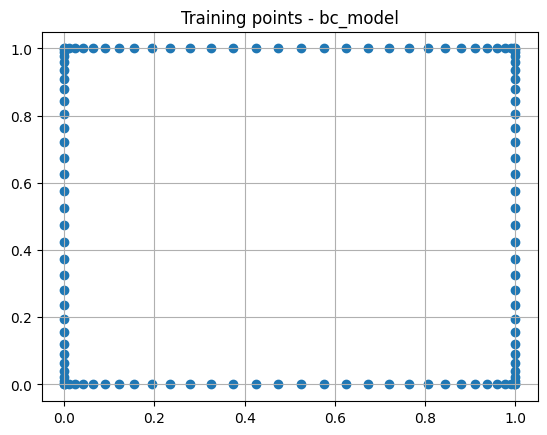

In [9]:
# Generate training data for the network
x = pb.generate_boundary_points(30, False)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Training points - bc_model")
plt.grid()

y = pb.u_exact(x[:, 0], x[:, 1])
y = tf.reshape(y, (-1, 1))

In [10]:
# Training process of bc_model with the MSE as loss function 
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
bc_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

history=model.fit(x, y, epochs=3000, batch_size=np.size(y))

Epoch 1/3000
1/1 [==============================] - 1s 698ms/step - loss: 1.0634
Epoch 2/3000
1/1 [==============================] - 0s 3ms/step - loss: 1.0161
Epoch 3/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.9720
Epoch 4/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.9312
Epoch 5/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.8936
Epoch 6/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.8591
Epoch 7/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.8275
Epoch 8/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7985
Epoch 9/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7718
Epoch 10/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.7472
Epoch 11/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7243
Epoch 12/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.7029
Epoch 13/3000
1/1 [============================

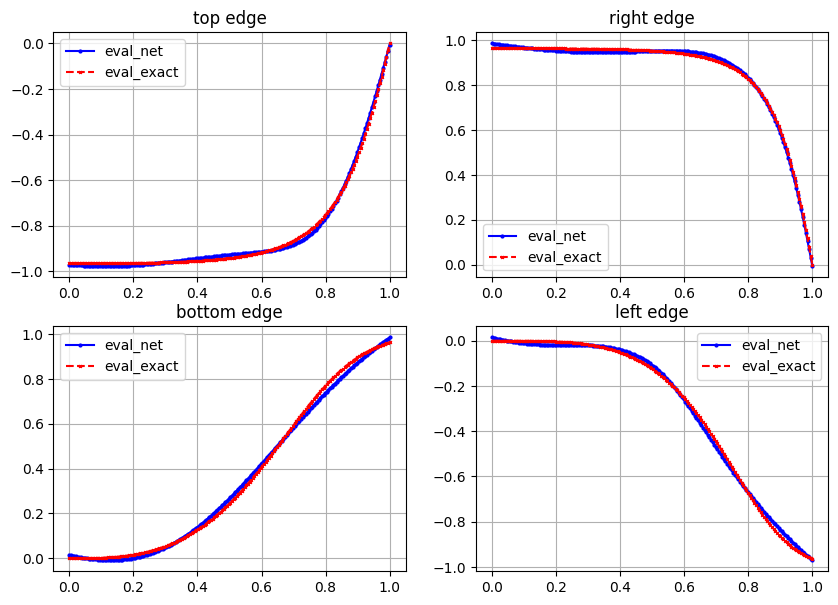

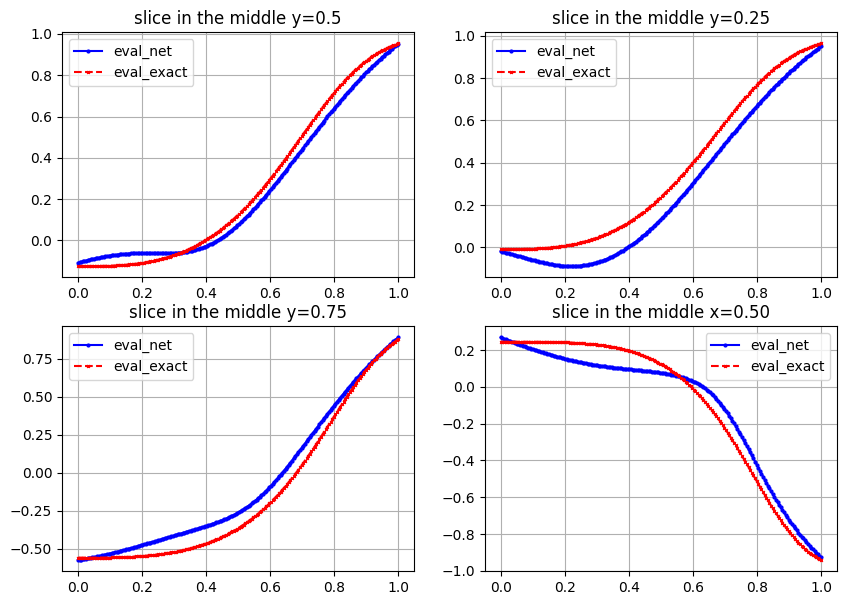

In [11]:
# Compare with the now trained network
plot_BC(pb.u_exact_np,model_np)

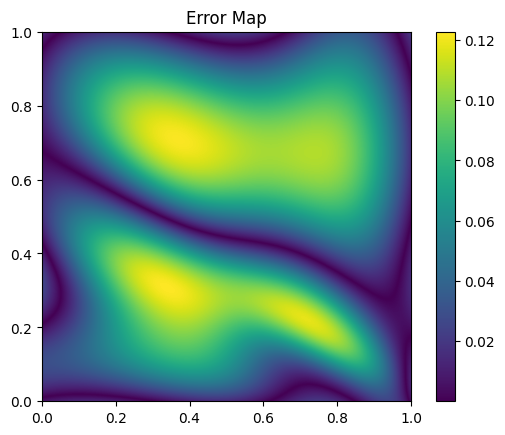

In [12]:
color_plot(bc_model)

In [13]:
# Make the bc_model non-trianable
for layer in bc_model.layers:
    layer.trainable = False

# Display model summary after making weights non-trainable
bc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 371 (2.90 KB)
_________________________________________________________________


###  VPINN MODEL

In [14]:
# Create the network to be trained on the variational form
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                150       
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5301 (41.41 KB)
Trainable params: 5301 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Problem parameters

In [15]:
# order of test function 
N_test = 2

params = {'scheme': 'VPINNs','N_test':N_test}



basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

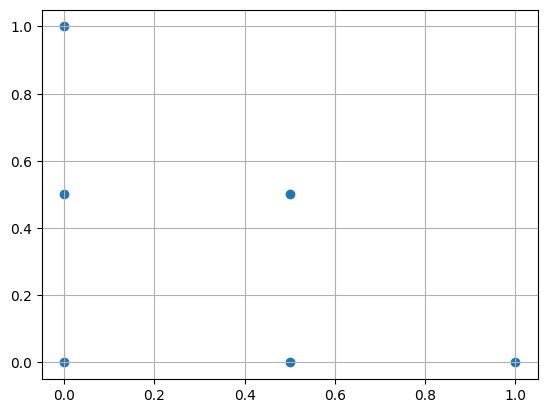

-->mesh : 
     n_triangles :  150
     n_vertices  :  88
     n_edges     :  237
     h_max           :  0.25
     h_min           :  0.0895721626833764
-->test_fun      : 
     order       :  2
     dof         :  277


In [16]:
# Initialise VPINN class
vp=VPINN(pb,params,mesh,True,NN=MODEL)
model=vp.u_NN_BC
vp.set_bc_model(bc_model)

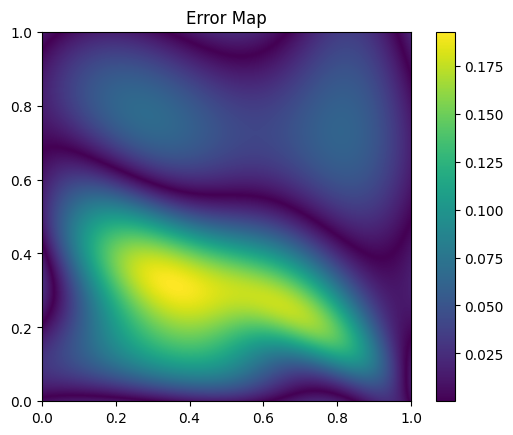

In [17]:
vp.set_bc_model(bc_model)
color_plot(vp.NN_imposeBC)

In [18]:
# Start training
history=vp.train(2000,0.001,bc_model)

Iteration: 0 loss: 0.0018474220 time: 25.40230703353882
Iteration: 10 loss: 0.0016860622 time: 0.0807194709777832
Iteration: 20 loss: 0.0015391566 time: 0.07748723030090332
Iteration: 30 loss: 0.0013834605 time: 0.08289957046508789
Iteration: 40 loss: 0.0012552850 time: 0.08091521263122559
Iteration: 50 loss: 0.0012147985 time: 0.07736539840698242
Iteration: 60 loss: 0.0012106187 time: 0.08060693740844727
Iteration: 70 loss: 0.0011932774 time: 0.07948660850524902
Iteration: 80 loss: 0.0011755955 time: 0.07777571678161621
Iteration: 90 loss: 0.0011485152 time: 0.07753229141235352
Iteration: 100 loss: 0.0011024683 time: 0.07969307899475098
Iteration: 110 loss: 0.0010254999 time: 0.10712265968322754
Iteration: 120 loss: 0.0009167726 time: 0.10903596878051758
Iteration: 130 loss: 0.0008191044 time: 0.11032462120056152
Iteration: 140 loss: 0.0007823468 time: 0.10908269882202148
Iteration: 150 loss: 0.0007648921 time: 0.10521483421325684
Iteration: 160 loss: 0.0007517971 time: 0.104296207427

## Analysis

### Loss

In [19]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

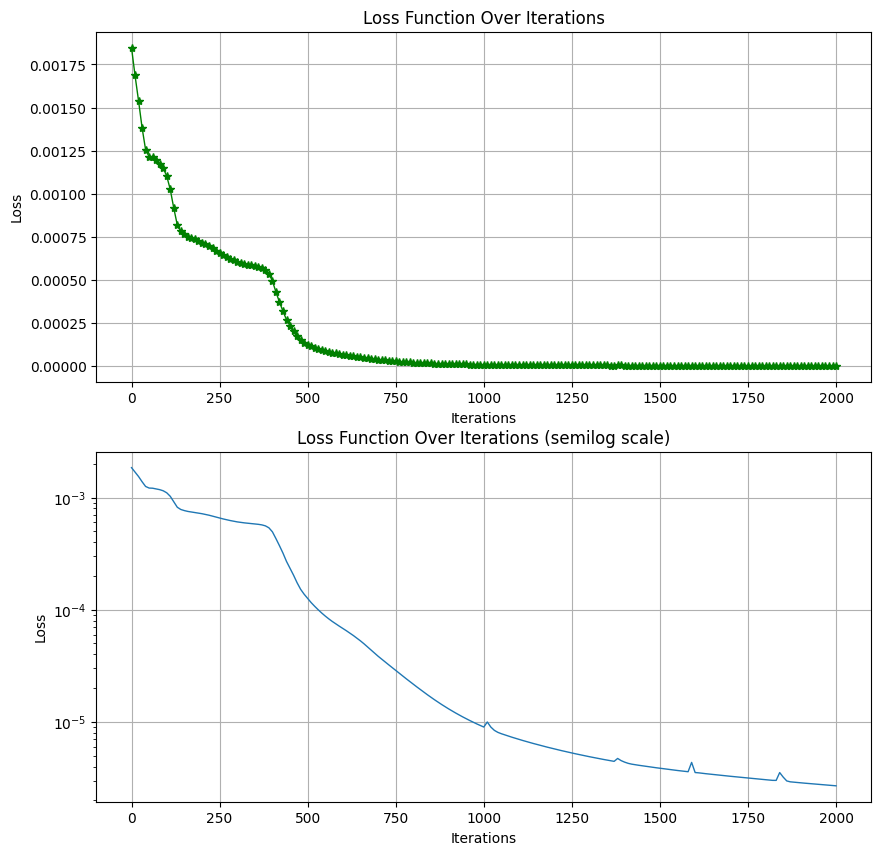

In [20]:
plot_loss(history)

### Prediction

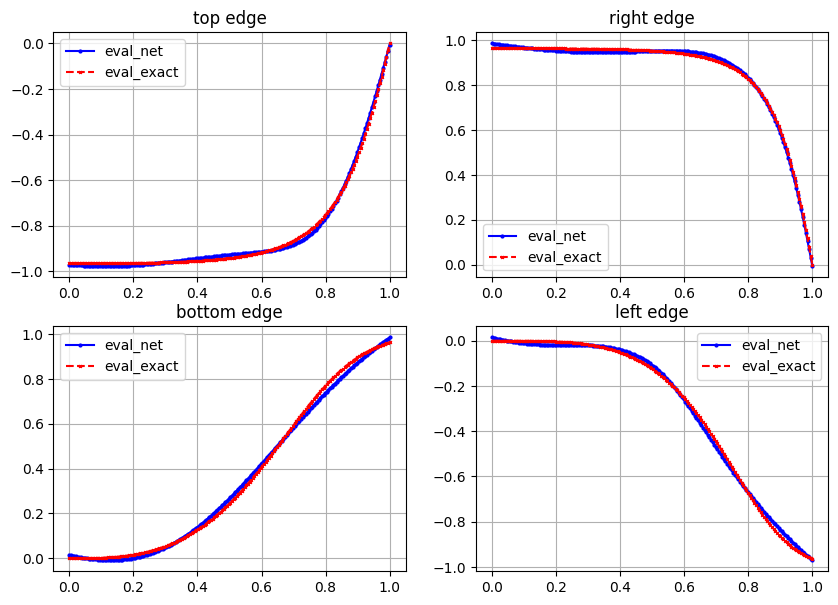

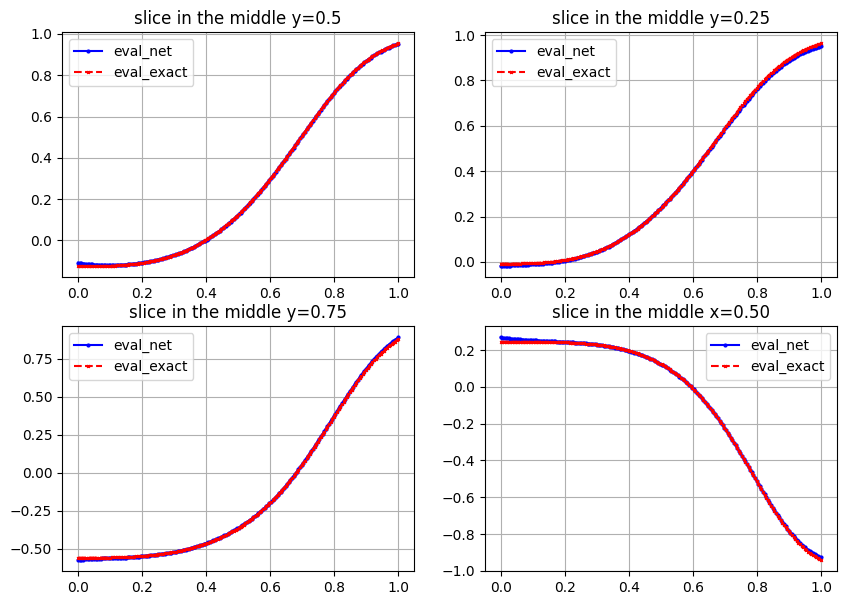

In [21]:
plot_BC(pb.u_exact_np,vp.u_NN_BC)

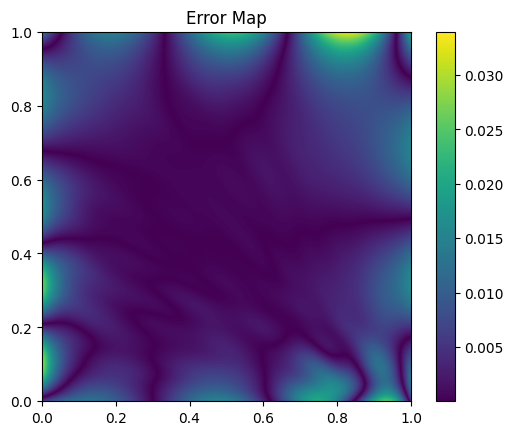

In [22]:
color_plot(vp.NN_imposeBC)

### Residuals

In [23]:
# Find the residuals over vertices and edges
if N_test == 1:
    residual_ending_vertices = vp.calc_residuals()   # r = 1 case
    vp.residual_summary(residual_ending_vertices)   # r = 1 case
elif N_test == 2:
    residual_ending_vertices, residual_ending_edges = vp.calc_residuals()  # r = 2
    vp.residual_summary(residual_ending_vertices,residual_ending_edges)  # r = 2


residual of vertices : 
-->max  =  0.0001552686906787108
-->min  =  3.802920282492395e-12
-->mean =  5.183772142993419e-06
residual of edges : 
-->max  =  2.1710594886166065e-05
-->min  =  3.178955715952418e-12
-->mean =  1.93970633418584e-06


/tmp/ipykernel_4564/659253298.py:20: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")
/home/mariano/Documenti/test/base/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,11 m=88 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess

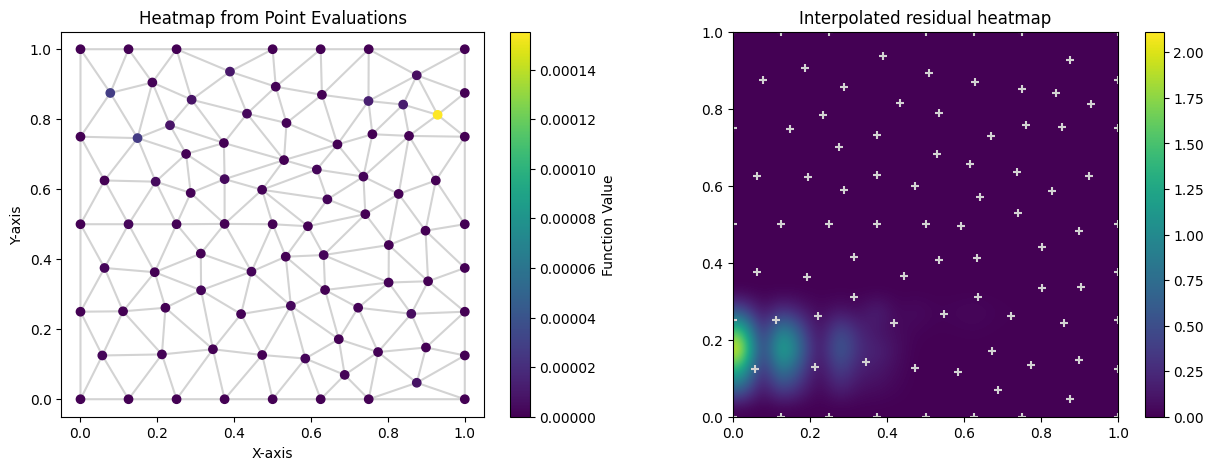

In [24]:
x = vp.mesh['vertices'][:,0]
y = vp.mesh['vertices'][:,1]

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.triplot(
    x,
    y, color='lightgrey'
)
scatter = plt.scatter(x, y, c=residual_ending_vertices, cmap='viridis', marker='o')

plt.colorbar(scatter, label='Function Value')
plt.title('Heatmap from Point Evaluations')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

import scipy.interpolate as sp

f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")

# from pylab import figure, cm
from matplotlib.colors import LogNorm

x_coords = np.linspace(0, 1, 20)
z_coords = np.linspace(0, 1, 20)
c_i = np.abs(f(x_coords, z_coords))

plt.subplot(122)
fig = plt.imshow(
    c_i,
    extent=[min(x), max(x), min(y), max(y)],
    origin="lower",
    interpolation="bicubic",
    # norm=LogNorm(vmin = np.min(c_i), vmax=np.max(c_i))
)
plt.title('Interpolated residual heatmap')
plt.scatter(x, y, color='lightgrey', marker='+')
plt.colorbar(fig)

### H1 and L2 error

In [25]:
# Get quad pairs
from numpy.polynomial import legendre


def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)



    nodes=(nodes+1.0)/2.0


    # Nodes=np.array([nodes],dtype=np_type)

    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))


    x, y =np.meshgrid(nodes,nodes)


    x = x.flatten()
    y = y.flatten()
 



    xy=np.array([x,y]).T


    return xy, w/4




In [26]:
def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))



def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = pw_diff*pw_diff


    # Return dx_error^2 + dy_error^2
    return np.sqrt(np.sum(np.sum(pw_diff,axis=1)*w))

### NETWORKS WITH EXACT BC

In [1]:
import os;
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import importlib

import VPINN_tri_final as VPINN_tri_final

import interpolator as interpolator

importlib.reload(VPINN_tri_final)

importlib.reload(interpolator)

from VPINN_tri_final import *
from interpolator import *

from MeshLib import MeshLib as ml


import PROBDEF

2023-12-07 07:54:31.904069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 07:54:33.075314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

generate mesh lib imported

MeshLib imported

interpolator_lib imported

interpolator_lib imported

settings_lib imported 



In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=100)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
#mesh = generate_mesh(domain, 0.01)

In [3]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

In [4]:
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


2023-12-07 07:54:36.906628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


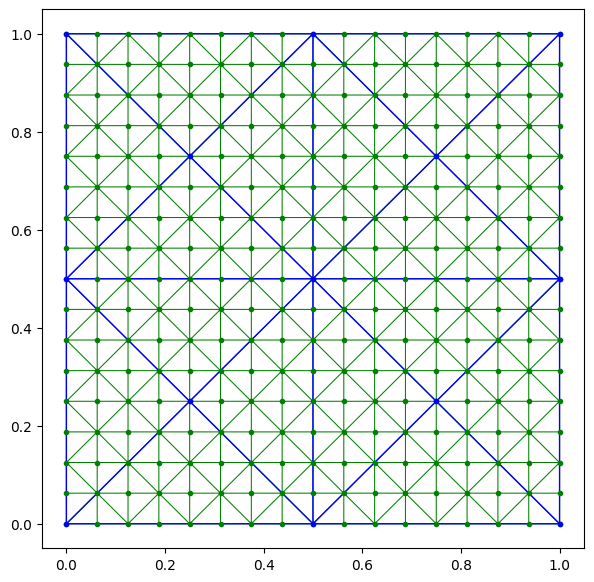

ratio =  5.65685424949238
h =  0.08838834764831845


In [5]:
mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=3

ml.compare(mesh_chain[index], mesh_chain[index+5],False)

print('ratio = ',mesh_chain[index].h_max /mesh_chain[index+5].h_max)
print('h = ',mesh_chain[index+5].h_max)


In [6]:
coarse_mesh = mesh_chain[index]
fine_mesh = mesh_chain[index+5]

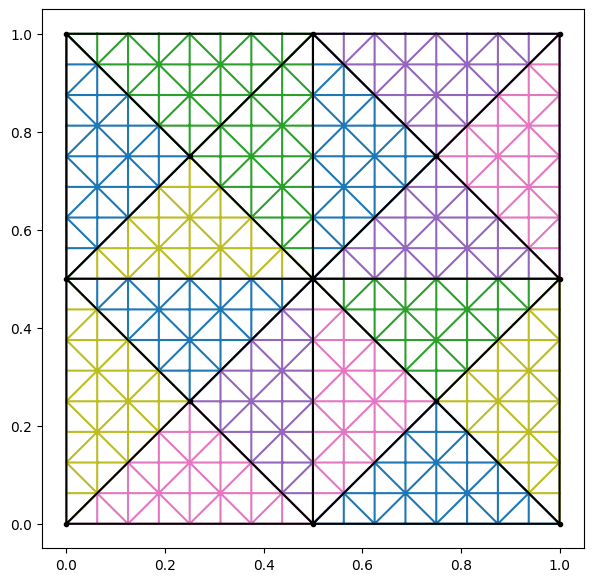

-->mesh : 
     n_triangles :  512
     n_vertices  :  289
     n_edges     :  800
     h_max           :  0.08838834764831845
     h_min           :  0.0625
-->test_fun      : 
     order       :  2
     dof         :  961


In [7]:
N_test = 2
r_interpoaltion=5

params = {'scheme': 'VPINNs','N_test':N_test,'r_interpolation':r_interpoaltion}
# importing probdef 
pb = PROBDEF.PROBDEF()
vp=VPINN(pb,params,fine_mesh,False,coarse_mesh,MODEL)
model=vp.u_NN_BC

In [8]:
# vp.helper()
# print(vp.x_to_eval_global)

In [9]:
# tf.reshape(vp.x_to_eval_global, (-1,2))

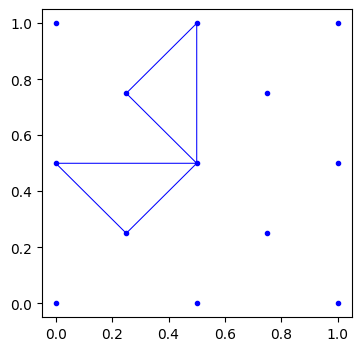

[5]


In [10]:
coarse_mesh.plot(triangles=[0,1])
print(list(range(5,6)))

In [11]:
vp.set_bc_model(vp.standard_bc)

2023-12-07 07:54:44.524982: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-12-07 07:54:44.679413: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-12-07 07:54:44.772890: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


2023-12-07 07:54:45.010621: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-12-07 07:54:45.156422: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


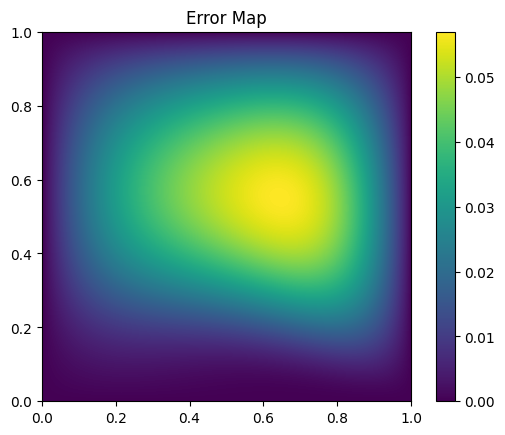

In [12]:
color_plot(vp.NN_imposeBC)

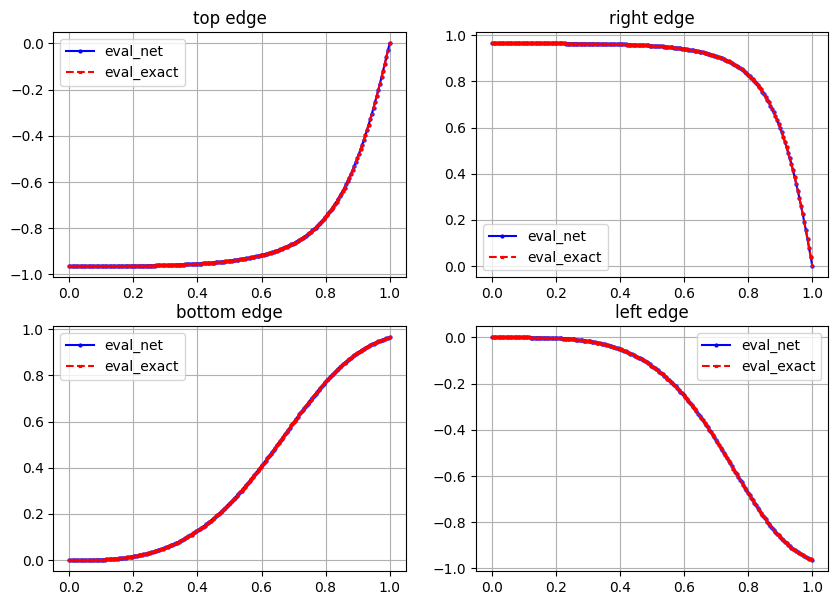

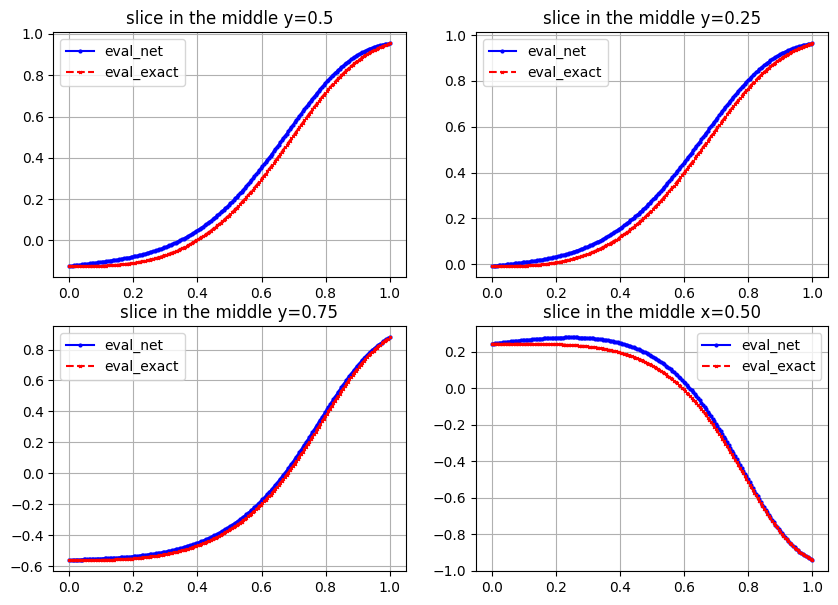

In [13]:
# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]


model =vp.NN_imposeBC

plot_BC(pb.u_exact_np,model_np)

In [14]:
vp.helper()
vp.custom_loss_IVPINN()

# print(np.shape())

In [15]:
history=vp.train(1000,0.001)

Iteration: 0 loss: 0.0009697574 time: 16.555135250091553
Iteration: 10 loss: 0.0009228878 time: 0.08848786354064941
Iteration: 20 loss: 0.0008866300 time: 0.09185004234313965
Iteration: 30 loss: 0.0008497653 time: 0.09800863265991211
Iteration: 40 loss: 0.0007972562 time: 0.10416030883789062
Iteration: 50 loss: 0.0007298300 time: 0.1026456356048584
Iteration: 60 loss: 0.0006585107 time: 0.10367345809936523
Iteration: 70 loss: 0.0006183567 time: 0.09681057929992676
Iteration: 80 loss: 0.0006179238 time: 0.10166049003601074
Iteration: 90 loss: 0.0006164552 time: 0.09561681747436523
Iteration: 100 loss: 0.0006143332 time: 0.09456920623779297
Iteration: 110 loss: 0.0006143212 time: 0.09969210624694824
Iteration: 120 loss: 0.0006139723 time: 0.09137940406799316
Iteration: 130 loss: 0.0006138066 time: 0.08879470825195312
Iteration: 140 loss: 0.0006136912 time: 0.08997631072998047
Iteration: 150 loss: 0.0006135694 time: 0.08889269828796387
Iteration: 160 loss: 0.0006134613 time: 0.08683204650

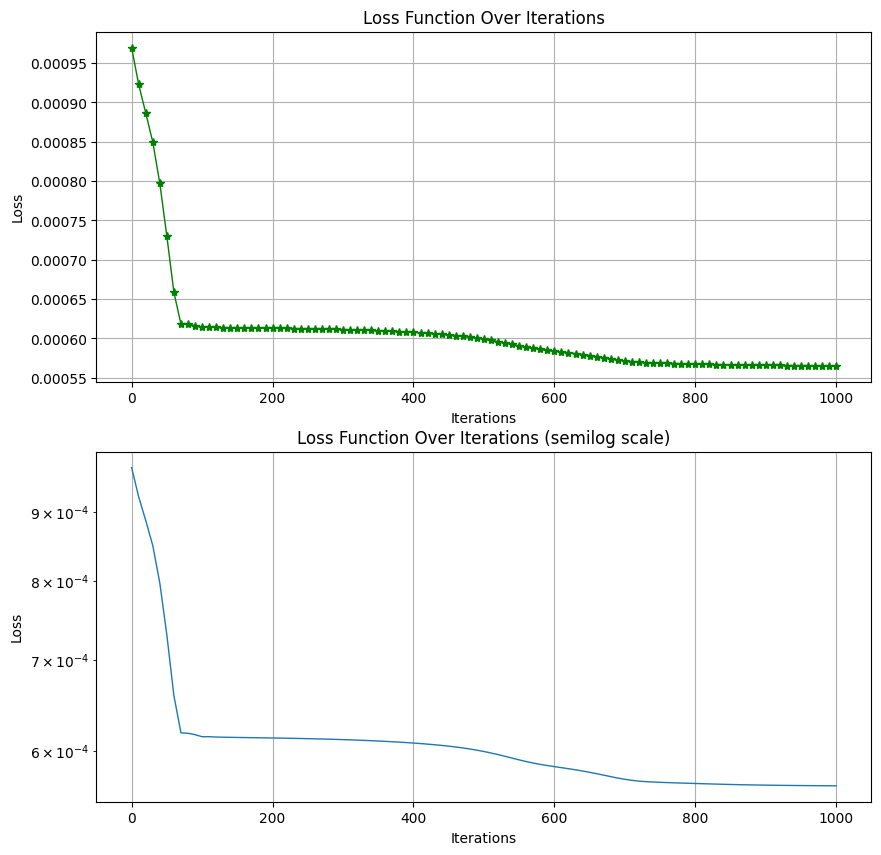

In [16]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
plot_loss(history)

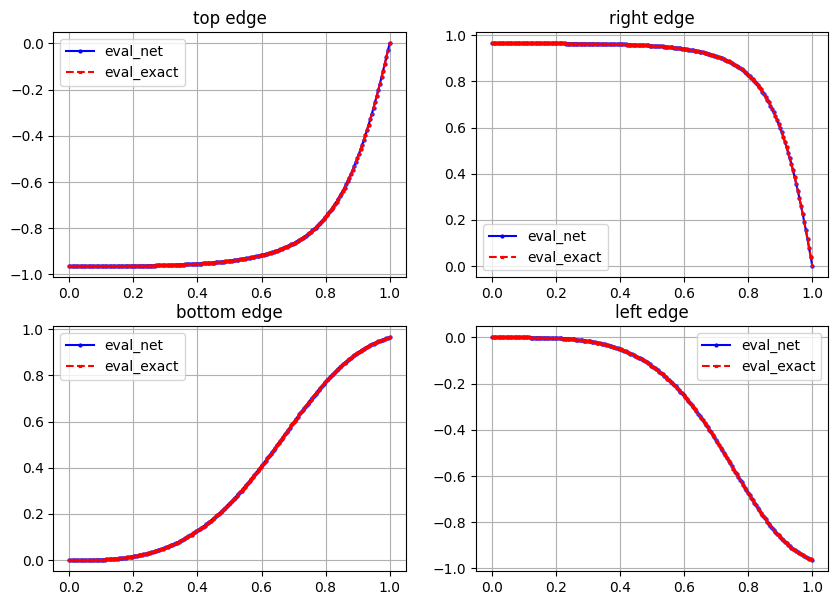

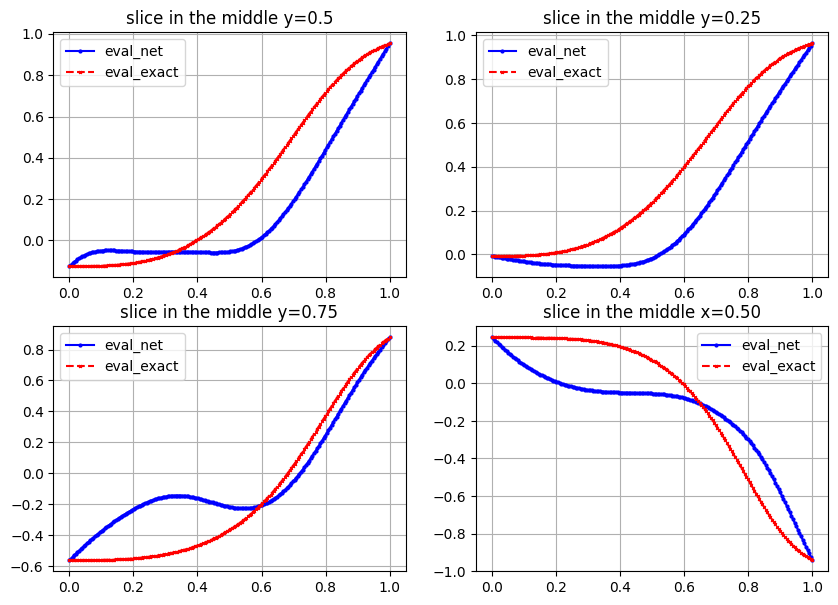

In [17]:
plot_BC(pb.u_exact_np,model_np)

In [18]:
print(type(vp.points))

<class 'numpy.ndarray'>


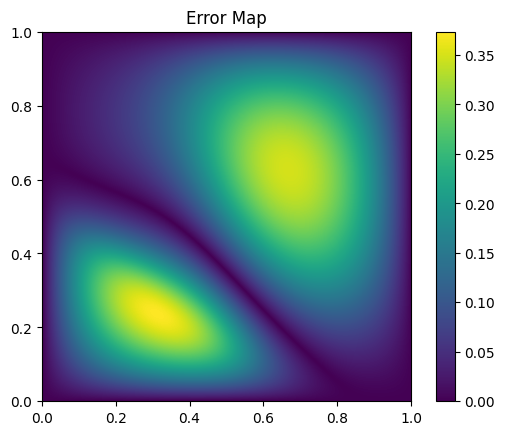

In [19]:
color_plot(vp.NN_imposeBC)

In [20]:
vertices_big = coarse_mesh.vertices[coarse_mesh.triangles[0]]

B_i, c_i, det_i, B_D_i, B_DD_i=vp.B.change_of_coordinates(vertices_big)

x_to_eval=B_i@vp.B.Nodes.T + c_i
# print(x_to_eval)
x_to_eval=tf.transpose(x_to_eval)

# print(B_i)
# print(vp.grad_test)

a = B_i @ vp.grad_test

print(a[0])

a = B_i @ vp.grad_test[0]
print(a)
# plt.scatter(x_to_eval[0], x_to_eval[1])

B_D_i @ grad_test

ValueError: too many values to unpack (expected 5)

In [ ]:
eval=vp.NN_imposeBC(x_to_eval)

a=vp.B.interpolate_dx_tf(vp.xy_quad_total[0],eval)  
b=vp.B.interpolate_dy_tf(vp.xy_quad_total[0],eval)

N = 21
v = np.zeros((N,1))
v[0] = 1000
vp.B.interpolate_dx_tf(np.array([[0,0], [1,0], [0,1]]), v)


print(vp.xy_quad_total[76])
print(len(fine_mesh.triangles))

tf.Tensor(
[[0.91666667 0.54166667]
 [0.88766081 0.59967837]
 [0.88766081 0.51266081]
 [0.97467837 0.51266081]
 [0.93376776 0.50746448]
 [0.93376776 0.55876776]
 [0.88246448 0.55876776]], shape=(7, 2), dtype=float64)
128


In [ ]:
B=interpolator(4,False,False,points=None)

N = B.n
v = np.zeros((N,1))

f = lambda x, y: x + y*y

a = tf.expand_dims(f(B.Nodes[:,0], B.Nodes[:,1]), axis=1)



B.interpolate_dy_tf(np.array([[0,0], [0.5, 0.5]]), a)


<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[0.],
       [1.]])>

In [ ]:
#set quad rule for calc errors
xy, w = get_quad_rule(30)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

NameError: name 'get_quad_rule' is not defined

In [ ]:
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (pb.u_exact(x,y)-vp.u_NN_BC(x,y))*(pb.u_exact(x,y)-vp.u_NN_BC(x,y)), 0.0, 1.0,0.0,1.0)


print('dnlquad :')
print(np.sqrt(integral))


dnlquad :
0.001747567286885768


### H1 and L2 convergence

-->mesh : 
     n_triangles :  2
     n_vertices  :  4
     n_edges     :  5
     h_max           :  1.4142135623730951
     h_min           :  1.0
-->test_fun      : 
     order       :  2
     dof         :  1
Iteration: 0 loss: 0.3736429865 time: 0.9649772644042969
Iteration: 10 loss: 0.0459737391 time: 0.008448362350463867
Iteration: 20 loss: 0.0000011240 time: 0.009308338165283203
Iteration: 30 loss: 0.0055249739 time: 0.0076367855072021484
Iteration: 40 loss: 0.0022593883 time: 0.009344100952148438
Iteration: 50 loss: 0.0000790069 time: 0.007683753967285156
Iteration: 60 loss: 0.0000769231 time: 0.009429454803466797
Iteration: 70 loss: 0.0001077260 time: 0.007580757141113281
Iteration: 80 loss: 0.0000458191 time: 0.009232282638549805
Iteration: 90 loss: 0.0000109052 time: 0.007622957229614258
Iteration: 100 loss: 0.0000015353 time: 0.008875370025634766
Iteration: 110 loss: 0.0000000818 time: 0.0074651241302490234
Iteration: 120 loss: 0.0000000033 time: 0.009206056594848633
Iterat

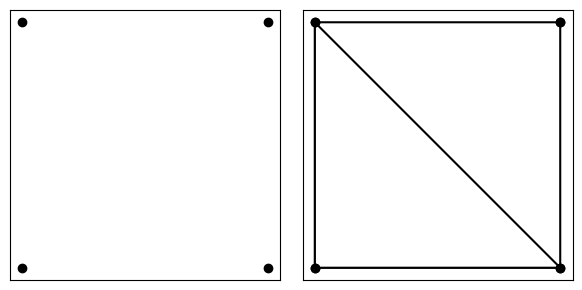

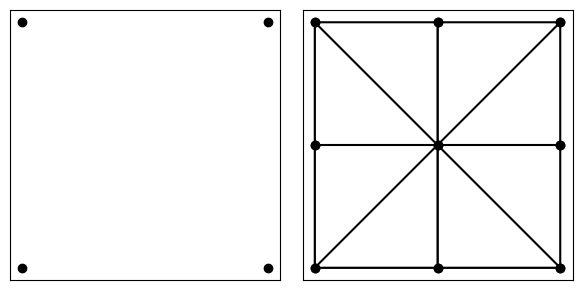

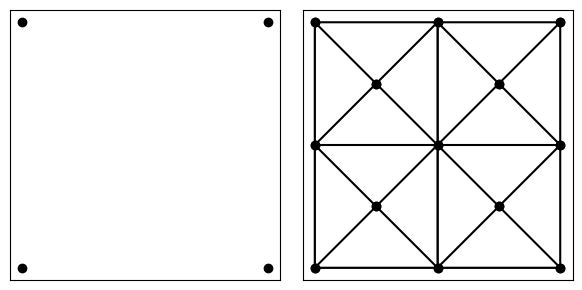

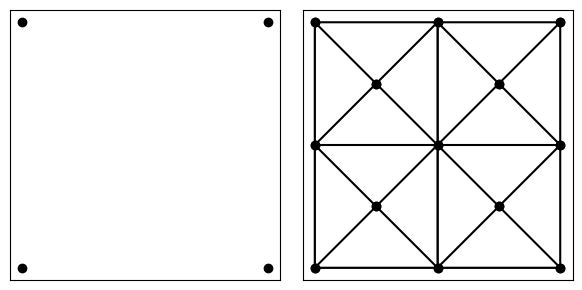

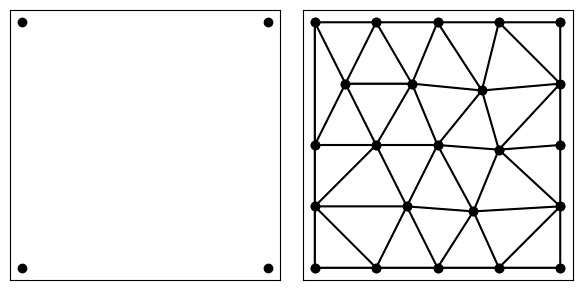

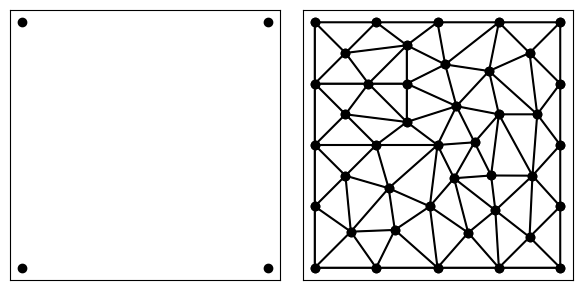

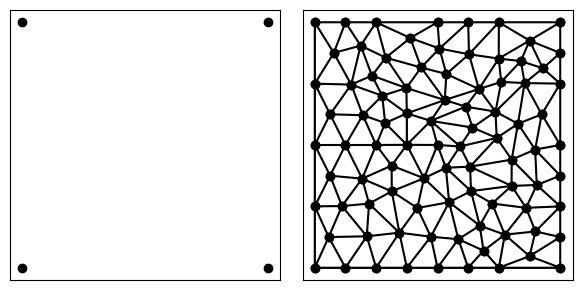

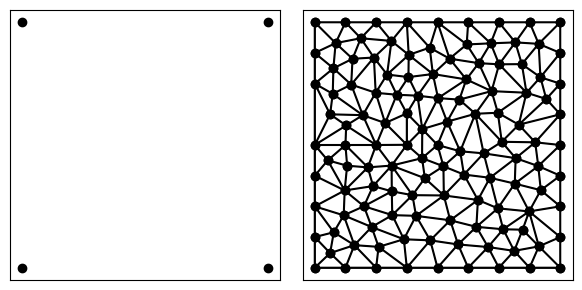

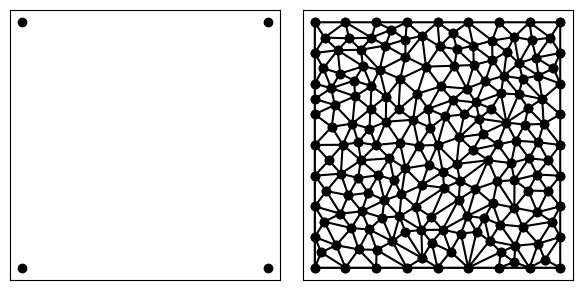

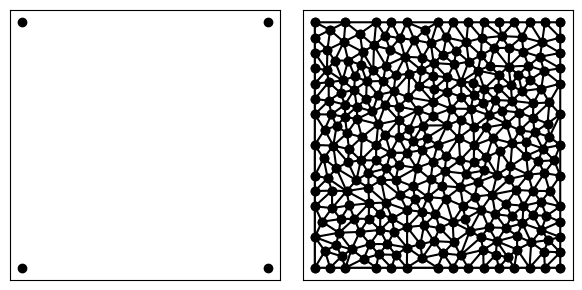

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(30)

H1 = []
L2 = []
semi = []
h = []

for refinement in [0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.008, 0.005, 0.003]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,False,model)
    history=vp.train(1000, 0.001)


    L2_error_=L2_error(xy,w)


    #semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=1E-5)
    #semi_H1_err = np.sqrt(semi_H1_err2)
    #H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    #H1.append(H1_err)
    #semi.append(semi_H1_err)
    L2.append(L2_error_)
    a, b = find_hs(mesh)
    h.append(0.5*a + 0.5*b)
    
    

In [ ]:
h = np.array(h)

#H1 = np.array(H1)
L2 = np.array(L2)
#semi = np.array(semi)

L2 rate: 1.6101881087337857


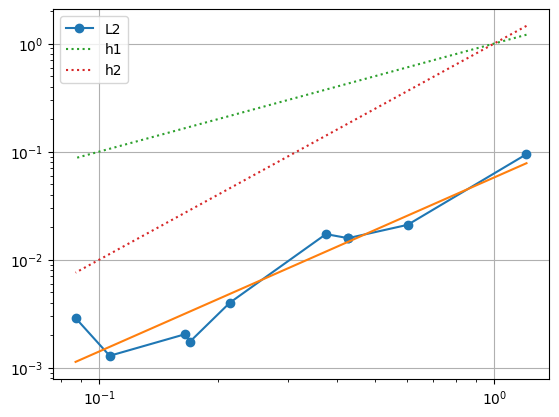

In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

#coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
#polynomial = np.poly1d(coeffs)
#log10_H1_fit = polynomial(np.log10(h))

#print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")

#plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
#plt.loglog(h, semi, marker='o', label='semi')
#plt.loglog(h, 10**log10_H1_fit)
plt.loglog(h, 10**log10_L2_fit)
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()